#  2022 Summer Internship 

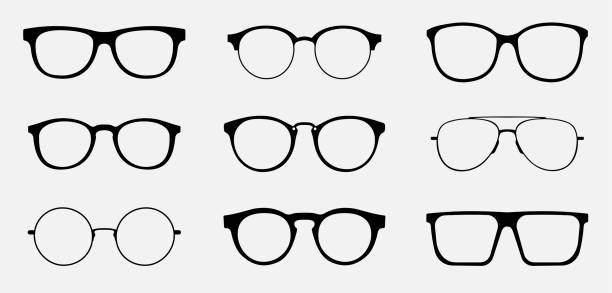

## About the Data

There are 12 variables:

Sexe: Which sex are the glasses suitable for  
Style: Glasses shape  
Marque: Glasses brand  
Matériaux_des_verres: Lenses material  
Nom: Glasses product name  
Couleur: Frame color  
Prix: Price of the glasses in Euros  
Plage d'EP: Pupillary distance   
Matériau_de_la_monture: Material of which the frame is made  
Convient aux verres progressifs: Wether is it convinient to varifocal glasses or not  
image url: Glasses image link  
Type: Optic or Solar glasses 



## packages

In [1]:

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from catboost import Pool



from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn  import tree 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn import svm
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

import time


## Load Data

In [2]:
#display the 5 first rows
df=pd.read_excel('glasses.xlsx')
df.head()

,Marque,Nom,Prix,Sexe,Couleur,Style,Matériau_de_la_monture,Matériaux_des_verres,Plage_ep,Convient_aux_verres_progressifs,Image_URL-src,Solaire
0,Ray Ban Kids,Ray-Ban Kids RJ9647S 288/13,81.0,Enfant,Transparent Marron Clair,Aviator,Métal,Plastique,67.0,Oui,https://image4.cdnsbg.com/1/278/579299_1638322...,True
1,Chloe,Chloe CH0081S 002,230.0,Femmes,Transparent Marron,Papillon,Acetate,CR39,73.0,Oui,https://image4.cdnsbg.com/1/241/572895_1643151...,True
2,Giorgio Armani,Giorgio Armani AR6060 30016G,219.0,Hommes,Noir Mat,Aviateur,Métal,Plastique,73.0,Oui,https://image4.cdnsbg.com/1/37/510317_15994951...,True
3,Vogue Eyewear,Vogue Eyewear VO5440S 300071,99.0,Femmes,Vert Foncé,Rectangulaire,Plastique,Plastique,69.0,Oui,https://image4.cdnsbg.com/1/59/602454_16522262...,True
4,Gucci,Gucci GG0448S 004,390.0,Hommes,La Havane,Aviateur,Acetate,Nylon,74.0,Oui,https://image4.cdnsbg.com/1/10/511654_16424756...,True


# Understand the Data

In [3]:
#get information about the data (how many non null value , the type of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7343 entries, 0 to 7342
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Marque                           7343 non-null   object 
 1   Nom                              7343 non-null   object 
 2   Prix                             6312 non-null   float64
 3   Sexe                             7284 non-null   object 
 4   Couleur                          7343 non-null   object 
 5   Style                            7343 non-null   object 
 6   Matériau_de_la_monture           7327 non-null   object 
 7   Matériaux_des_verres             6052 non-null   object 
 8   Plage_ep                         5588 non-null   float64
 9   Convient_aux_verres_progressifs  5608 non-null   object 
 10  Image_URL-src                    7343 non-null   object 
 11  Solaire                          7343 non-null   bool   
dtypes: bool(1), float64(

In [4]:
# our data it's about numbers so we implement this command to get some informations about our columns
df.describe()

,Prix,Plage_ep
count,6312.000000,5588.000000
mean,142.302041,70.717788
std,82.231339,3.882007
min,10.530000,38.000000
25%,72.000000,69.000000
50%,132.000000,71.000000
75%,190.000000,73.000000
max,990.000000,82.000000


In [5]:
df.columns

Index(['Marque', 'Nom', 'Prix', 'Sexe', 'Couleur', 'Style',
       'Matériau_de_la_monture', 'Matériaux_des_verres', 'Plage_ep',
       'Convient_aux_verres_progressifs', 'Image_URL-src', 'Solaire'],
      dtype='object')

In [6]:
# to know how many NaN value in our Data
df.isnull().sum()

Marque                                0
Nom                                   0
Prix                               1031
Sexe                                 59
Couleur                               0
Style                                 0
Matériau_de_la_monture               16
Matériaux_des_verres               1291
Plage_ep                           1755
Convient_aux_verres_progressifs    1735
Image_URL-src                         0
Solaire                               0
dtype: int64

In [7]:
# to know how many rows and columns we have
df.shape

(7343, 12)

## PRIX

In [8]:
df['PrixInterval'] = pd.cut(df['Prix'],[10.00, 50.00, 90.00, 140.00, 200.00, 300.00, 600.00])
print(df['PrixInterval'].value_counts())

(140.0, 200.0]    1554
(90.0, 140.0]     1447
(50.0, 90.0]      1263
(200.0, 300.0]    1095
(10.0, 50.0]       734
(300.0, 600.0]     217
Name: PrixInterval, dtype: int64


There are more women than men in our dataset and, apparently, men have a slightly higher chance of default. We will try to confirm it a little later by comparing men and women with the same education and marital status.



## Marque

In [9]:
 print (df['Matériau_de_la_monture'].unique())

['Métal' 'Acetate' 'Plastique' nan 'Stainless Steel' 'Polycarbonate'
 'Injected Plastic' 'Pantographed Plastic' 'Tr90' 'Polyamide' 'Titane'
 'Alluminium' 'Propionate' 'Stainless Steel/TAC'
 'Polyamide Inj-Gril./Rubber' 'Nylon' 'Steel' 'Écologique' 'Bioplastic'
 'Plastic Injected' 'Grilamid' 'Tri-Acetate' 'Fibre Carbone' 'Bois'
 'Optyl' 'Acetate/Steel' 'Polymethyl Methacrylate'
 'Clair Acetate/Beta-Titanium' 'Cellulose Prop. Inj' 'Polyurethane'
 'Wood | Eco-Friendly' '-7.00 ~ +7.00' 'Stainless Steel/Carbon Fiber'
 'Stainless Steel/Metal' 'Aluminium' 'Metal/Stainless Steel'
 'Titanium/Beta-Titanium' 'Polyamide Inj-Gril.' 'Cerclée' 'Avec Clip'
 'Carbon Fibre' 'Plastic/Metal' 'Peek' 'TR90' 'Metal/Plastic']


In [10]:
print (df['Couleur'].unique())

['Transparent Marron Clair' 'Transparent Marron' 'Noir Mat' 'Vert Foncé'
 'La Havane' 'Matt Black Bleu Ruthenium' 'Blanc ivoire Gold'
 'Brillant Silver' 'Rubber Havana' 'Transparent Marron Gold' 'Noir'
 'Marron' 'Blanc ivoire' 'Dark Aqua Bleu' 'Brillant Havana' 'Spotted Vert'
 'Blonde Havana' 'Noir Brillant' 'Brillant Trasparent Marron Clair'
 'La Havane Foncé' 'Tortoise' 'Pale Gold' 'Rouge Silver' 'Or'
 'Satin Marron' 'Ecaille de tortue' 'Argent' 'Sand Black'
 'Spotted Marron Havana' 'Antique Gunmetal' 'Transparent Gris'
 'Blanc Tortoise' 'Havana Tortoise' 'Blanc' 'Rouge' 'Gunmetal Gris' 'Gold'
 'Transparent Crystal' 'DoréeBlack' 'Doré Noir' 'Bleu Mat'
 'La Havane Clair' 'Fuzzy Black' 'Glossy Black' 'Transparent Orange Gold'
 'Transparent Olive Vert' 'Brillant Medium Havana' 'Rose Gold'
 'Transparent Vert' 'Bordeaux' 'Matte Navy Bleu' 'Copper Marron'
 'Matte Clear' 'Vert Crystal' 'Transparent Pink' 'Black Tortoise Two-Tone'
 'Striped Violet' 'Pink Havana' 'Rose' 'Caramel Tortoise'
 'P

In [11]:

df.loc[df['Couleur'].str.contains('Anthracite'), 'Couleur'] = 'Noir'
df.loc[df['Couleur'].str.contains('Black'), 'Couleur'] = 'Noir'
df.loc[df['Couleur'].str.contains('black'), 'Couleur'] = 'Noir'
df.loc[df['Couleur'].str.contains('noir'), 'Couleur'] = 'Noir'
df.loc[df['Couleur'].str.contains('Noir'), 'Couleur'] = 'Noir'

df.loc[df['Couleur'].str.contains('Pink'), 'Couleur'] = 'Rose'
df.loc[df['Couleur'].str.contains('pink'), 'Couleur'] = 'Rose'
df.loc[df['Couleur'].str.contains('rose'), 'Couleur'] = 'Rose'
df.loc[df['Couleur'].str.contains('Rose'), 'Couleur'] = 'Rose'


df.loc[df['Couleur'].str.contains('Orange'), 'Couleur'] = 'Orange'
df.loc[df['Couleur'].str.contains('orange'), 'Couleur'] = 'Orange'

df.loc[df['Couleur'].str.contains('Fuchsia'), 'Couleur'] = 'Violet'
df.loc[df['Couleur'].str.contains('Violet'), 'Couleur'] = 'Violet'
df.loc[df['Couleur'].str.contains('violet'), 'Couleur'] = 'Violet'






df.loc[df['Couleur'].str.contains('Olive'), 'Couleur'] = 'Vert'
df.loc[df['Couleur'].str.contains('Woodgrain'), 'Couleur'] = 'Vert'
df.loc[df['Couleur'].str.contains('Green'), 'Couleur'] = 'Vert'
df.loc[df['Couleur'].str.contains('green'), 'Couleur'] = 'Vert'
df.loc[df['Couleur'].str.contains('vert'), 'Couleur'] = 'Vert'
df.loc[df['Couleur'].str.contains('Vert'), 'Couleur'] = 'Vert'


df.loc[df['Couleur'].str.contains('Turquoise'), 'Couleur'] = 'Bleu'
df.loc[df['Couleur'].str.contains('Navy'), 'Couleur'] = 'Bleu'
df.loc[df['Couleur'].str.contains('Blue'), 'Couleur'] = 'Bleu'
df.loc[df['Couleur'].str.contains('blue'), 'Couleur'] = 'Bleu'
df.loc[df['Couleur'].str.contains('bleu'), 'Couleur'] = 'Bleu'
df.loc[df['Couleur'].str.contains('Bleu'), 'Couleur'] = 'Bleu'


df.loc[df['Couleur'].str.contains('Chocolate'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('Havane'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('Havana'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('havana'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('Brown'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('brown'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('marron'), 'Couleur'] = 'Marron'
df.loc[df['Couleur'].str.contains('Marron'), 'Couleur'] = 'Marron'

df.loc[df['Couleur'].str.contains('White'), 'Couleur'] = 'Blanc'
df.loc[df['Couleur'].str.contains('white'), 'Couleur'] = 'Blanc'
df.loc[df['Couleur'].str.contains('blanc'), 'Couleur'] = 'Blanc'
df.loc[df['Couleur'].str.contains('Blanc'), 'Couleur'] = 'Blanc'



df.loc[df['Couleur'].str.contains('Ivory'), 'Couleur'] = 'Beige'
df.loc[df['Couleur'].str.contains('Beige'), 'Couleur'] = 'Beige'
df.loc[df['Couleur'].str.contains('beige'), 'Couleur'] = 'Beige'


df.loc[df['Couleur'].str.contains('Grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('gris'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Gris'), 'Couleur'] = 'Gris'


df.loc[df['Couleur'].str.contains('Carbon'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Cement'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Smokey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('gunmetal'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Gunmetal'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('gris'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Gris'), 'Couleur'] = 'Gris'





df.loc[df['Couleur'].str.contains('Fibre Carbone'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Pewter'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Graphite'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Powder Cement'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Steel'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('grey'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('gris'), 'Couleur'] = 'Gris'
df.loc[df['Couleur'].str.contains('Gris'), 'Couleur'] = 'Gris'


df.loc[df['Couleur'].str.contains('Bordeaux'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('Cherry'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('Bourgogne'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('Burgundy'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('Red'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('red'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('rouge'), 'Couleur'] = 'Rouge'
df.loc[df['Couleur'].str.contains('Rouge'), 'Couleur'] = 'Rouge'

df.loc[df['Couleur'].str.contains('Yellow'), 'Couleur'] = 'Jaune'
df.loc[df['Couleur'].str.contains('yellow'), 'Couleur'] = 'Jaune'
df.loc[df['Couleur'].str.contains('jaune'), 'Couleur'] = 'Jaune'
df.loc[df['Couleur'].str.contains('Jaune'), 'Couleur'] = 'Jaune'

#INUSUAL COLORS

df.loc[df['Couleur'].str.contains('Gold'), 'Couleur'] = 'Dorée'
df.loc[df['Couleur'].str.contains('gold'), 'Couleur'] = 'Dorée'
df.loc[df['Couleur'].str.contains('dorée'), 'Couleur'] = 'Dorée'
df.loc[df['Couleur'].str.contains('Dorée'), 'Couleur'] = 'Dorée'


df.loc[df['Couleur'].str.contains('crystal'), 'Couleur'] = 'Cristal'
df.loc[df['Couleur'].str.contains('Crystal'), 'Couleur'] = 'Cristal'

df.loc[df['Couleur'].str.contains('Tortoise'), 'Couleur'] = 'Tortue'
df.loc[df['Couleur'].str.contains('tortue'), 'Couleur'] = 'Tortue'
df.loc[df['Couleur'].str.contains('Tortue'), 'Couleur'] = 'Tortue'

df.loc[df['Couleur'].str.contains('Or'), 'Couleur'] = 'Dorée'
df.loc[df['Couleur'].str.contains('Doré'), 'Couleur'] = 'Dorée'

 

df.loc[df['Couleur'].str.contains('Argent'), 'Couleur'] = 'Argenté'
df.loc[df['Couleur'].str.contains('Ruthenium'), 'Couleur'] = 'Argenté'
df.loc[df['Couleur'].str.contains('Silver'), 'Couleur'] = 'Argenté'
df.loc[df['Couleur'].str.contains('silver'), 'Couleur'] = 'Argenté'

df.loc[df['Couleur'].str.contains('Bronze'), 'Couleur'] = 'Bronze'
df.loc[df['Couleur'].str.contains('Copper'), 'Couleur'] = 'Bronze'

df.loc[df['Couleur'].str.contains('Arc-en-ciel'), 'Couleur'] = 'Multicouleurs'
df.loc[df['Couleur'].str.contains('Rainbow'), 'Couleur'] = 'Multicouleurs'

df.loc[df['Couleur'].str.contains('Trasparent'), 'Couleur'] = 'Transparent'
df.loc[df['Couleur'].str.contains('Transparent'), 'Couleur'] = 'Transparent'


df.loc[df['Couleur'].str.contains('Ruthenium'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('Polished Clear'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('No Need'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('Bakelite'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('Ecaille Foncé'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('Matte Clear'), 'Couleur'] = 'Inconnue'
df.loc[df['Couleur'].str.contains('Satin Chrome'), 'Couleur'] = 'Inconnue'


In [12]:
#  import os
# import shutil


# def substring_after(s, delim):
#     return s.partition(delim)[2]
# toRemove1 = ""
# toRemove2 = "https://www.directsight.co.uk/resources/version/"
# #df = df.reset_index()  # make sure indexes pair with number of rows

# for index, row in df.iterrows():
#     #print(row['Couleur'], row['Marque'])
#     # defining the functions to execute
#     imgsrc= row['Image_URL-src']
#     imgsrc = imgsrc.replace("https://image4.cdnsbg.com/1/","")
#     imgsrc = imgsrc.replace(toRemove2,"")
#     imgsrc = imgsrc.replace(".jpg","")
    
#     filename = substring_after(imgsrc, "/")
    
#     # importing the modules
  
#     # Providing the folder path
#     origin = r'C:\Users\kais\Desktop\Stage\DATASET'
#     target = r'C:\Users\kais\Desktop\Stage\DATASET' +'\\' +row['Couleur']
#   # Fetching the list of all the files
#     files = os.listdir(origin)

#     # Fetching all the files to directory
#     for filename in files:
#        shutil.copy(origin+'\\'+filename, target+'\\'+filename)
#     print("Files are copied successfully")

   

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\kais\\Desktop\\Stage\\DATASET\\Argenté'

In [27]:
#!pip install pyperclip
import pyperclip

toCopy=""
for index, row in df.iterrows():
    if row['Couleur'] == "Marron":
        toCopy += row['Image_URL-src'] + "\n"  
        pyperclip.copy(toCopy)
        

In [29]:
!pip install tensorflow
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [34]:
!pip install pydot
!pip install graphviz

In [30]:
model = ResNet50()

102967424/102967424 [==============================] - 83s 1us/step


In [35]:
plot_model(model, to_file='output/resnet50_model.jpg')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [36]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

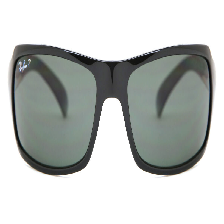

In [38]:
imageFolder = 'C:/Users/kais/Desktop/Stage/DATASET/Noir/'
filePath = imageFolder + '5723_1599492359134.jpg'
image1 = image.load_img(filePath, target_size = (224, 224))
image1

In [39]:
transformedImage = image.img_to_array(image1)
print(transformedImage.shape)

(224, 224, 3)


In [40]:
print(transformedImage)

[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]


In [41]:
import numpy as np
transformedImage = np.expand_dims(transformedImage, axis = 0)
transformedImage.shape

(1, 224, 224, 3)

In [42]:
from tensorflow.keras.applications.resnet50 import preprocess_input

In [44]:
transformedImage = preprocess_input(transformedImage)
transformedImage

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [45]:
prediction = model.predict(transformedImage)
print(prediction)

1/1 [==============================] - 1s 777ms/step
[[1.40008689e-08 2.16686269e-09 3.37934902e-09 6.73890366e-09
  6.03424581e-08 1.94501212e-07 1.45228229e-08 6.03872646e-11
  2.20230334e-10 5.60105184e-10 5.61549307e-10 9.11613174e-10
  5.42863254e-10 2.52813015e-09 7.92547583e-10 5.87314775e-09
  4.89121010e-09 4.23339319e-09 3.77713194e-10 2.87465385e-09
  5.09277842e-10 3.80924181e-09 8.07225564e-10 1.90587013e-09
  5.76341863e-09 6.31042107e-09 9.45114986e-10 2.91744051e-09
  1.27249244e-09 4.94823127e-10 4.05157685e-09 9.38801592e-10
  9.74561987e-10 6.70529188e-11 3.13663207e-09 4.04834638e-10
  1.53696078e-09 3.60721092e-10 5.32616795e-08 6.76855405e-10
  1.30952937e-09 2.73849721e-09 1.18472987e-09 6.46388942e-09
  1.88939464e-09 2.11253726e-09 2.63101629e-09 2.20088925e-09
  3.66468023e-10 4.48647286e-10 3.02758840e-09 4.93224377e-07
  3.18971738e-09 4.02287199e-08 4.04705713e-10 6.83073154e-09
  1.82969195e-10 1.16527732e-09 2.66550004e-09 1.48942414e-08
  1.48953705e-09 

In [46]:
print(prediction.shape)

(1, 1000)


In [47]:
from tensorflow.keras.applications.resnet50 import decode_predictions
predictionLabel = decode_predictions(prediction, top = 1)
predictionLabel

35363/35363 [==============================] - 0s 2us/step


[[('n04355933', 'sunglass', 0.7266633)]]

In [48]:
predictionLabel[0][0]

('n04355933', 'sunglass', 0.7266633)

In [ ]:
predictionLabel[0][0][1]

In [49]:
print('%s (%.2f%%)' % (predictionLabel[0][0][1], predictionLabel[0][0][2]*100 ))

sunglass (72.67%)


In [51]:
### SECOND TRY